In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow
path=pathy+'/data/nu_sweep_2022-02-05-06-48-21/nu_sweep_0.1/data2022-02-05-02-37-39.h5'
df = pd.read_hdf(path)

In [3]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,2.443406,0.554963,1.227667,-0.001738,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
1,0.000000,1.034,2.379235,0.063862,1.227667,-0.001738,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
2,0.000000,2.068,2.363710,0.021365,1.227667,-0.001738,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
3,0.000000,3.102,2.376350,0.063982,1.227667,-0.001738,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
4,0.000000,4.136,2.360448,0.055831,1.227667,-0.001738,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,2.450049,0.000994,1.070053,0.611908,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
196,0.523599,202.664,2.450327,0.000983,1.070053,0.611908,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
197,0.523599,203.698,2.450932,0.000978,1.070053,0.611908,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
198,0.523599,204.732,2.451441,0.000970,1.070053,0.611908,2.0,0.1,6000,622,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34


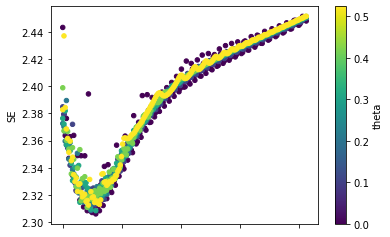

In [4]:
ax2 = df.plot( x='freq',y='SE', c='theta',colormap='viridis', sharex=True, kind='scatter')

# For T=2

In [33]:
path=pathy+'/data/nu_sweep_2022-02-05-06-48-21'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-05-06-48-21/nu_sweep_0.3/data2022-02-05-05-24-03.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-05-06-48-21/nu_sweep_0.05/data2022-02-05-01-14-26.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-05-06-48-21/nu_sweep_0.2/data2022-02-05-04-00-52.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-05-06-48-21/nu_sweep_0.5/data2022-02-05-06-48-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-05-06-48-21/nu_sweep_0.1/data2022-02-05-02-37-39.h5


In [34]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,2.373061,2.413063,0.878664,-0.001738,2.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
1,0.000000,1.034,2.251860,1.064948,0.878664,-0.001738,2.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
2,0.000000,2.068,2.156195,0.325184,0.878664,-0.001738,2.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
3,0.000000,3.102,2.129956,0.110559,0.878664,-0.001738,2.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
4,0.000000,4.136,2.157907,0.319799,0.878664,-0.001738,2.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,5.445502,0.001363,2.437255,1.411560,2.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
196,0.523599,202.664,5.449322,0.001338,2.437255,1.411560,2.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
197,0.523599,203.698,5.453224,0.001319,2.437255,1.411560,2.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
198,0.523599,204.732,5.457077,0.001300,2.437255,1.411560,2.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34


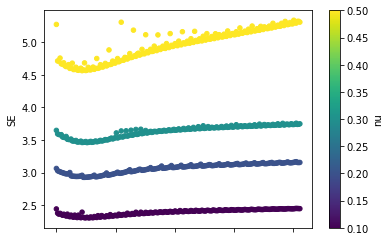

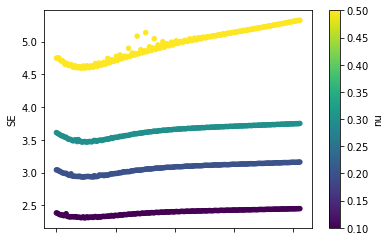

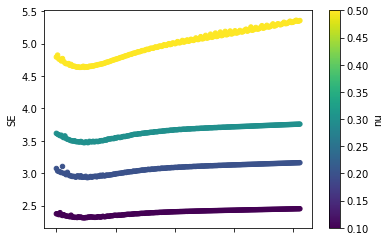

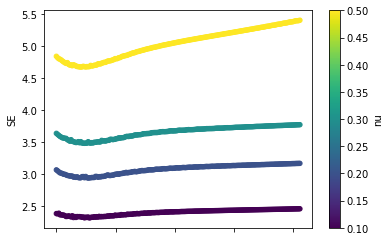

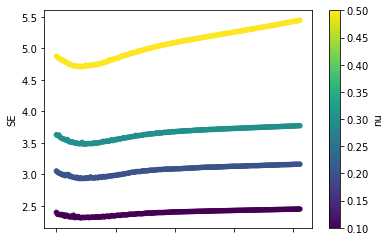

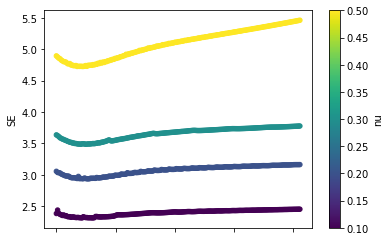

In [35]:
thets=df['theta'].unique()
for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['nu'] >= 0.09)]
    ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


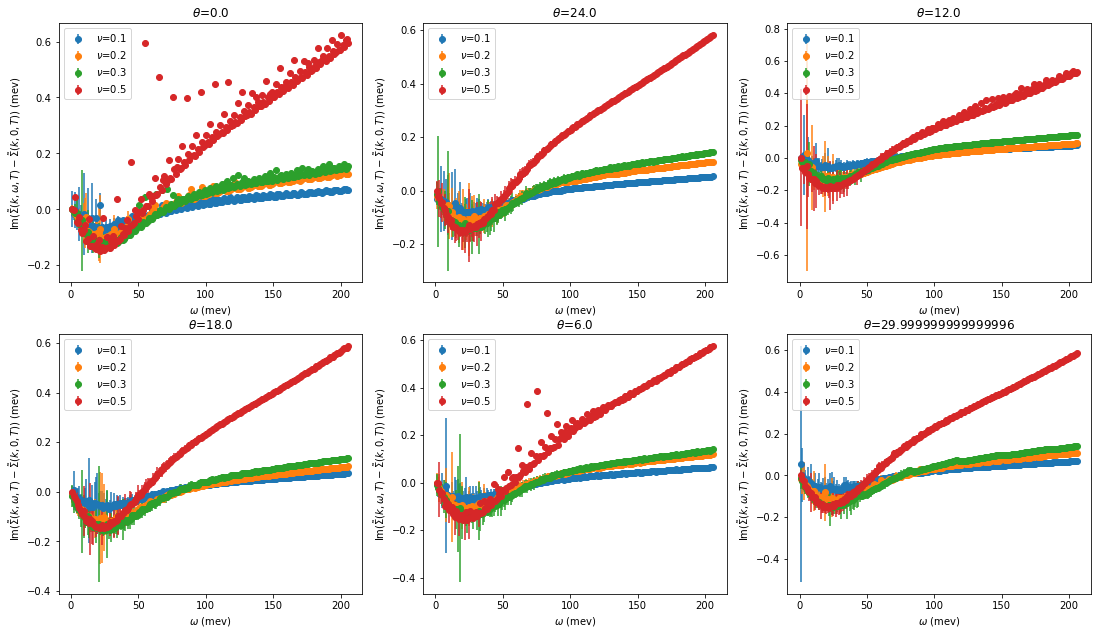

In [39]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )&(df['nu'] >= 0.09)]
    nus=df2['nu'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for nu in nus:
        
        df3=df2.loc[(df2['nu'] ==nu )&(df2['nu'] >= 0.09)]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[0]['SE']
        if th ==0.0:
            y=df3['SE']-df3.iloc[1]['SE']
        if nu==0.5:
            y=df3['SE']-df3.iloc[1]['SE']
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$\nu$='+str(nu), fmt='o')
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


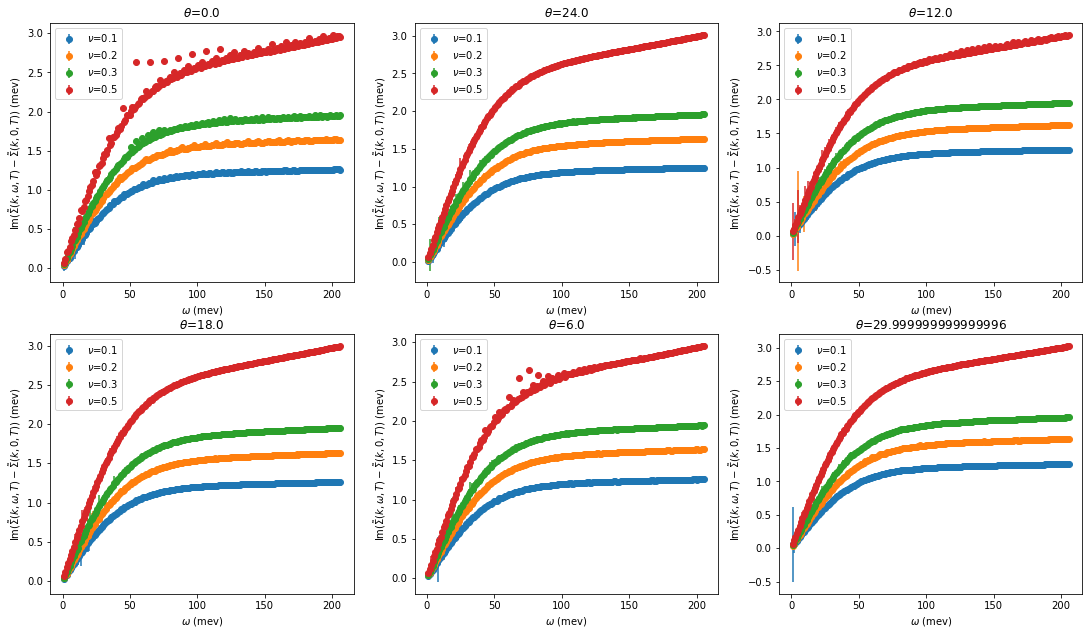

In [38]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )&(df['nu'] >= 0.09)]
    nus=df2['nu'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for nu in nus:
        
        df3=df2.loc[(df2['nu'] ==nu )&(df2['nu'] >= 0.09)]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']/(1+np.exp(-0.05*x))-df3.iloc[0]['SE']/(1+np.exp(-0.05*x[0]))
        if th ==0.0:
            y=df3['SE']/(1+np.exp(-0.05*x))-df3.iloc[1]['SE']/(1+np.exp(-0.05*x[0]))
        if nu==0.5:
            y=df3['SE']/(1+np.exp(-0.05*x))-df3.iloc[1]['SE']/(1+np.exp(-0.05*x[0]))
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$\nu$='+str(nu), fmt='o')
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

# For T=1

In [9]:

path=pathy+'/data/nu_sweep_2022-02-04-16-36-47'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])




reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-04-16-36-47/nu_sweep_0.3/data2022-02-04-15-13-46.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-04-16-36-47/nu_sweep_0.05/data2022-02-04-11-03-32.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-04-16-36-47/nu_sweep_0.2/data2022-02-04-13-50-33.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-04-16-36-47/nu_sweep_0.5/data2022-02-04-16-36-46.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-04-16-36-47/nu_sweep_0.1/data2022-02-04-12-27-12.h5


In [10]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,1.548502,1.245964,0.878664,-0.001738,1.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
1,0.000000,1.034,1.481924,0.632476,0.878664,-0.001738,1.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
2,0.000000,2.068,1.410546,0.161582,0.878664,-0.001738,1.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
3,0.000000,3.102,1.388300,0.068754,0.878664,-0.001738,1.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
4,0.000000,4.136,1.391089,0.161160,0.878664,-0.001738,1.0,0.05,6000,667,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,5.638663,0.000574,2.437255,1.411560,1.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
196,0.523599,202.664,5.641964,0.000566,2.437255,1.411560,1.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
197,0.523599,203.698,5.645289,0.000555,2.437255,1.411560,1.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
198,0.523599,204.732,5.648609,0.000545,2.437255,1.411560,1.0,0.50,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34


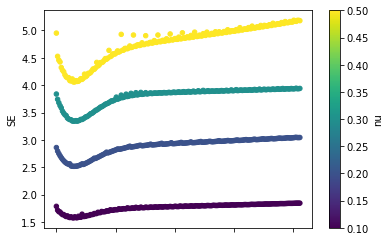

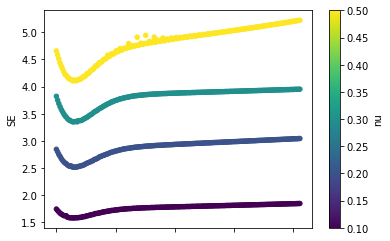

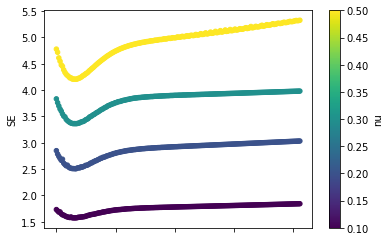

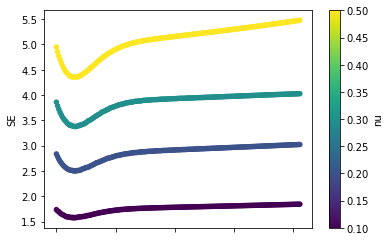

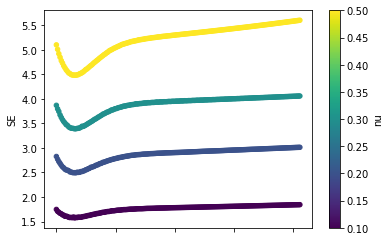

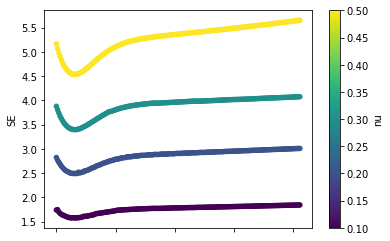

In [11]:
thets=df['theta'].unique()
for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['nu'] >= 0.09)]
    ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


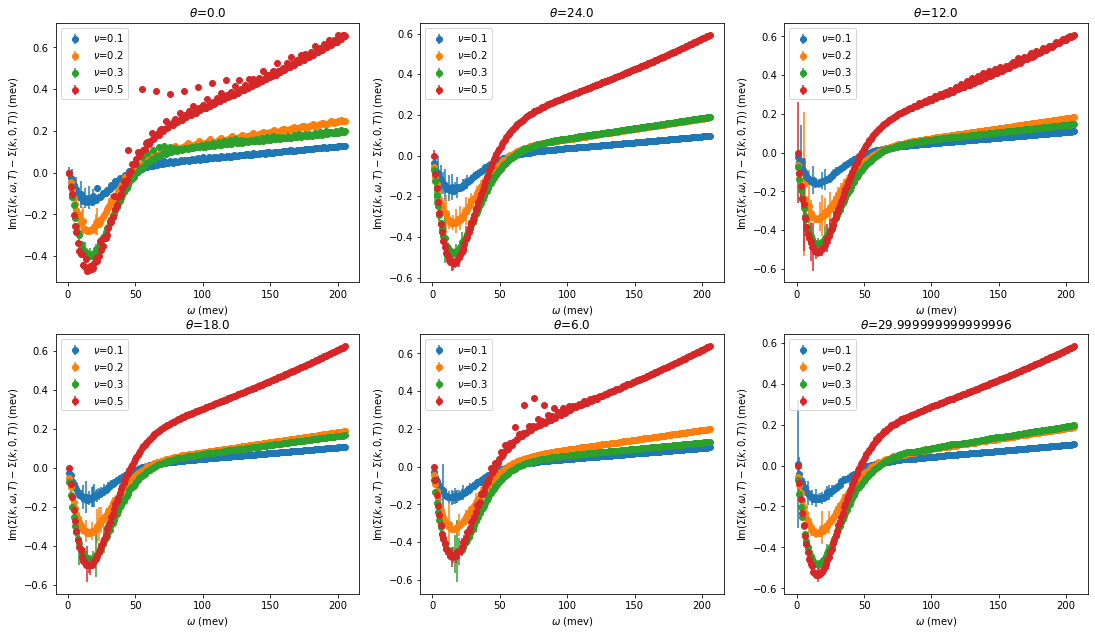

In [12]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )&(df['nu'] >= 0.09)]
    nus=df2['nu'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for nu in nus:
        
        df3=df2.loc[(df2['nu'] ==nu )&(df2['nu'] >= 0.09)]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[0]['SE']
        if th ==0.0:
            y=df3['SE']-df3.iloc[1]['SE']
        if nu==0.5:
            y=df3['SE']-df3.iloc[1]['SE']
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],y[1:],yerr=err[1:] ,   label=r'$\nu$='+str(nu), fmt='o')
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\Sigma(k,\omega, T)-\Sigma(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


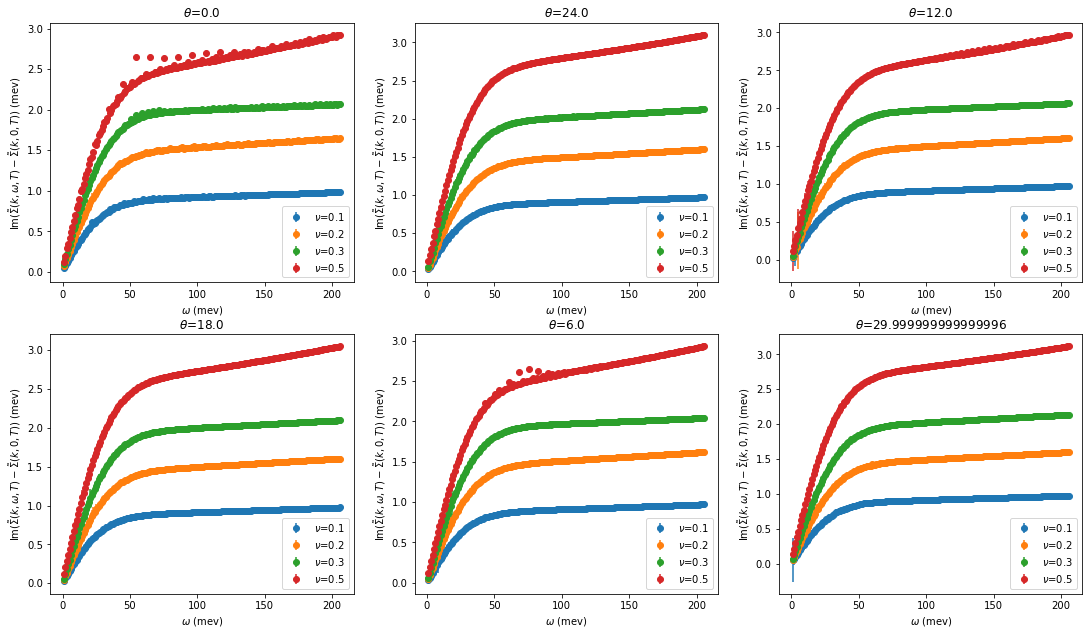

In [32]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )&(df['nu'] >= 0.09)]
    nus=df2['nu'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for nu in nus:
        
        df3=df2.loc[(df2['nu'] ==nu )&(df2['nu'] >= 0.09)]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']/(1+np.exp(-0.1*x))-df3.iloc[0]['SE']/(1+np.exp(-0.1*x[0]))
        if th ==0.0:
            y=df3['SE']/(1+np.exp(-0.1*x))-df3.iloc[1]['SE']/(1+np.exp(-0.1*x[0]))
        if nu==0.5:
            y=df3['SE']/(1+np.exp(-0.1*x))-df3.iloc[1]['SE']/(1+np.exp(-0.1*x[0]))
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$\nu$='+str(nu), fmt='o')
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')